# Name :- Sakshat Umesh Salekar
# Task 1: Predict the Percentage of a student based on the no. of study hours. 



# Importing Libraries

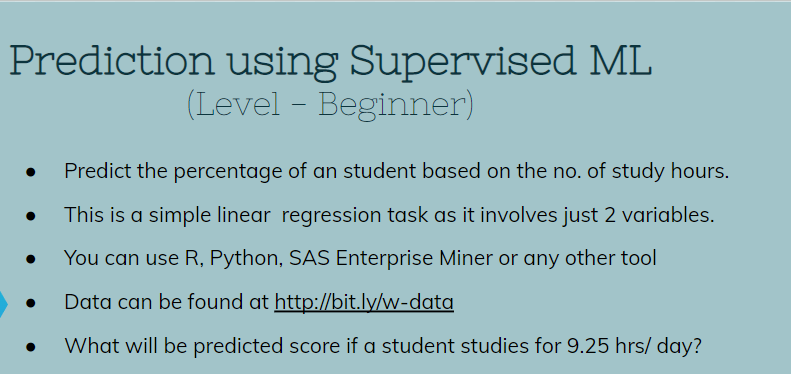

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

# Loading Dataset

In [4]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Let's get stastical information about the dataset

In [6]:
#number of rows and columns
df.shape

(25, 2)

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.columns     # Display the coloumn names

Index(['Hours', 'Scores'], dtype='object')

# Checking for Null values

In [9]:
df.isnull().sum()     # Sum of null values present

Hours     0
Scores    0
dtype: int64

# Plotting the Data

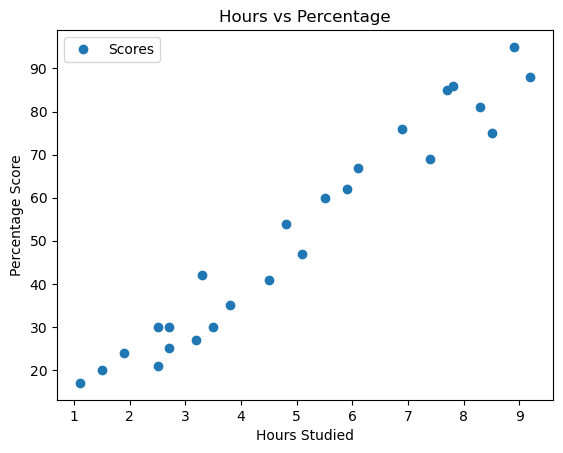

In [10]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

There is a positive linear relationship between the number of study hours and percentage of score.

# Preparing the data

In [11]:
x = df.iloc[:,:-1].values  # Extracts all rows and all columns except for the last column
y = df.iloc[:,1].values    # Extracts all rows of the second column 

# Train Test split

<ul>
<li>Now we will split the data into training and testing sets with splitting rule 80-20.</li>
<li>Here we use train_test_split method using sklearn library.</li>
<ul>

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle =True)
print(f"Rows in x_train set: {len(x_train)}\nRows in y_train set: {len(y_train)}\n\nRows in x_test set: {len(x_test)}\nRows in y_test: {len(y_test)}")

Rows in x_train set: 20
Rows in y_train set: 20

Rows in x_test set: 5
Rows in y_test: 5


# Model Training

In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train, y_train)

print("Training Complete.")

Training Complete.


# Plotting The Regression Line

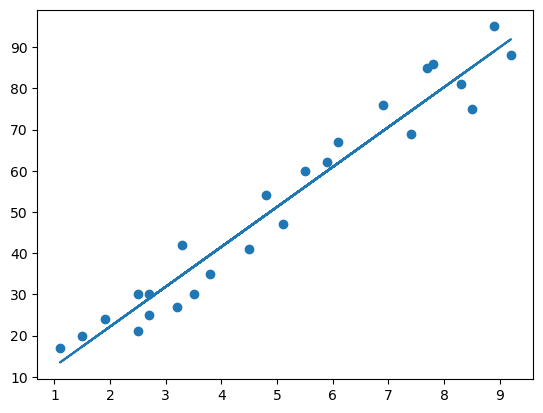

In [14]:
line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# Prediction with test data

In [16]:
print(x_test) # Testing data - In Hours
reg_pred = reg.predict(x_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


 Comparing Actual(y_test)v/s Predicted values(reg_pred).

In [17]:
df = pd.DataFrame({"Actual":y_test,"Predicted":reg_pred})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [18]:
hours = 9.25
own = reg.predict([[hours]])
print(f"Number of hours : {hours}")
print(f"Predicted Scores : {own}")

Number of hours : 9.25
Predicted Scores : [92.38611528]


Which shows that if student will study for *9.25 hours* then he will get percent score of *92.38%*


# Model Evaluation

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("R_square:",r2_score(y_test,reg_pred)) 
print("Mean squared Error:",mean_squared_error(y_test,reg_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,reg_pred))

R_square: 0.9678055545167994
Mean squared Error: 18.943211722315272
Mean Absolute Error: 3.9207511902099244


Conclusions:

From the analysis performed above we can conclude following things:
Here R_Square value is *0.9735* which shows that *97.35%* of variation in the outcome(dependent) variable is explained by independent variable.

Model predicts that if a student studies for *9.25 hours per day* then he/she will score *92.38%*.